# 포화 수증기압 이용

  
- 포화 수증기압 공식을 통해 실제 수증기압 알아낸다. 이후, 코일 온도의 포화 수증기압과 실제 수증기압의 차를 구해서 불포화상태,과포화 상태를 알아낸다. 이를 swv_value값으로 나타낸다.

포화 수증기압 공식

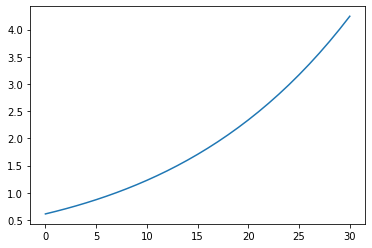

In [ ]:
x = []
y = []
for i in range(0,31) :
    t = i
    a= (6.11 * (10)**((7.5*t)/(t+237.3))) /10
    x.append(t)
    y.append(a)

plt.plot(x,y)

In [ ]:
x[10],y[10]

(10, 12.283343142218987)

### 포화 수증기압 (saturated water vapor) 함수

In [ ]:
def swv(t1_df,t2_df,hum_df) :
    
    loc_swv = t1_df.apply(lambda t1 : (6.11 * (10)**((7.5*t1)/(t1+237.3))) /10)
    coil_swv = t2_df.apply(lambda t2 :(6.11 * (10)**((7.5*t2)/(t2+237.3))) /10 )
    now_vr = (loc_swv*hum_df) / 100

    # loc_swv = (6.11 * (10)**((7.5*t1)/(t1+237.3))) /10
    # coil_swv = (6.11 * (10)**((7.5*t2)/(t2+237.3))) /10
    # now_vr = (loc_swv*hum)/ 100
    # return 0 if (coil_swv - now_vr ) >0 else 1
    
    
    return coil_swv- now_vr

### swv 함수를 이용한 loc1 결로 검증

In [ ]:
# coil 포화수증기량 - 현재 수증기량 값
a=swv(loc1['plant1_train.tem_in_loc1'],loc1['plant1_train.tem_coil_loc1'],loc1['plant1_train.hum_in_loc1'])

In [ ]:
# coil 포화수증기량 - 현재 수증기량이 양수이면 0, 0이거나 음수이면 1
b = a.apply(lambda x :0 if x>0 else 1)

In [ ]:
loc1['swv_value']= a

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:

loc1['cond_with_swv'] = b

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
val_swv = loc1[(loc1['cond_with_swv']==1)&(loc1['plant1_train.cond_loc1'].notnull())]

In [ ]:
val_swv.shape

(154, 6)

In [ ]:
val_swv[val_swv['plant1_train.cond_loc1']==0]

,datetime,plant1_train.tem_in_loc1,plant1_train.hum_in_loc1,plant1_train.tem_coil_loc1,plant1_train.cond_loc1,cond_with_swv


In [ ]:
loc1.loc[(loc1['plant1_train.cond_loc1']==1)& (loc1['cond_with_swv']==0) & (loc1['swv_value']>=0.1)] 

- 코일의 포화수증기량 - 실제 수증기량을 통해 cond_with_swv 변수 도출
- cond_with_swv 변수는 결로가 발생했는지 여부이며 cond 변수와 값이 일치해야한다. 
- cond 결로 값 총 275개 , cond_with_swv 결로 값 총 154개로 절반 이상은 맞춤
- 0.15 안쪽으로 대다수의 불일치 값이 존재한다.


In [ ]:
plant1.head(0)

,Unnamed: 0,plant1_train.mea_ddhr,plant1_train.tem_in_loc1,plant1_train.hum_in_loc1,plant1_train.tem_coil_loc1,plant1_train.tem_in_loc2,plant1_train.hum_in_loc2,plant1_train.tem_coil_loc2,plant1_train.tem_in_loc3,plant1_train.hum_in_loc3,plant1_train.tem_coil_loc3,plant1_train.tem_out_loc1,plant1_train.hum_out_loc1,plant1_train.cond_loc1,plant1_train.cond_loc2,plant1_train.cond_loc3,datetime
